# Imports

In [9]:
import numpy as np
import pandas as pd
import os

import bokeh.io
bokeh.io.output_notebook()

Loading BokehJS ...

# Loading in `.csv` files to see what's what

In [3]:
train_df = pd.read_csv('../Data/train.csv')

train_df

Unnamed: 0                                               Path     Sex  \
0                0            train/pid50512/study1/view1_frontal.jpg  Female   
1                1            train/pid21580/study2/view1_frontal.jpg  Female   
2                2            train/pid21580/study1/view1_frontal.jpg  Female   
3                3            train/pid21580/study1/view2_lateral.jpg  Female   
4                4            train/pid33839/study1/view1_frontal.jpg    Male   
...            ...                                                ...     ...   
178153      223409            train/pid16708/study2/view1_frontal.jpg    Male   
178154      223410            train/pid16708/study1/view1_frontal.jpg    Male   
178155      223411            train/pid32381/study1/view1_frontal.jpg  Female   
178156      223412            train/pid25865/study1/view1_frontal.jpg  Female   
178157      223413  CheXpert-v1.0/train/patient64540/study1/view1_...  Female   

        Age Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  \
0        68         Frontal    AP         1.0                         NaN   
1        87         Frontal    AP         NaN                         NaN   
2        83         Frontal    AP         NaN                         NaN   
3        83         Lateral   NaN         NaN                         NaN   
4        41         Frontal    AP         NaN                         NaN   
...     ...             ...   ...         ...                         ...   
178153   59         Frontal    AP         NaN                         NaN   
178154   59         Frontal    AP         NaN                         NaN   
178155    0         Frontal    AP         NaN                         NaN   
178156    0         Frontal    AP         NaN                         NaN   
178157    0         Frontal    AP         1.0                         NaN   

        Cardiomegaly  Lung Opacity  Lung Lesion  Edema  Consolidation  \
0                NaN           NaN          NaN    NaN            NaN   
1                0.0           1.0          NaN    0.0            0.0   
2                NaN           1.0          NaN    NaN            0.0   
3                NaN           1.0          NaN    NaN            0.0   
4                NaN           NaN          NaN    1.0            NaN   
...              ...           ...          ...    ...            ...   
178153           NaN           0.0          NaN    NaN            NaN   
178154           NaN           0.0          NaN    NaN            NaN   
178155           NaN           NaN          NaN    0.0            NaN   
178156           1.0           1.0          NaN    NaN            NaN   
178157           NaN           NaN          NaN    NaN            NaN   

        Pneumonia  Atelectasis  Pneumothorax  Pleural Effusion  Pleural Other  \
0             NaN          NaN          -1.0               NaN            NaN   
1             NaN          0.0           NaN               0.0            NaN   
2             NaN          NaN           NaN               NaN            NaN   
3             NaN          NaN           NaN               NaN            NaN   
4             NaN          NaN          -1.0               NaN            NaN   
...           ...          ...           ...               ...            ...   
178153        NaN          0.0          -1.0               1.0            NaN   
178154       -1.0          0.0           NaN               0.0            NaN   
178155        NaN          NaN           NaN               NaN            NaN   
178156        0.0          1.0          -1.0               NaN            NaN   
178157        NaN          NaN          -1.0               NaN            NaN   

        Fracture  Support Devices  
0            NaN              1.0  
1            1.0              NaN  
2            1.0              NaN  
3            1.0              NaN  
4            NaN              NaN  
...          ...              ...  
178153  

In [43]:
train2023_df = pd.read_csv('../Data/train2023.csv')

train2023_df

Unnamed: 0.1  Unnamed: 0  \
0                  0           0   
1                  1           1   
2                  2           2   
3                  3           3   
4                  4           4   
...              ...         ...   
178153        178153      223409   
178154        178154      223410   
178155        178155      223411   
178156        178156      223412   
178157        178157      223413   

                                                     Path     Sex  Age  \
0                 train/pid50512/study1/view1_frontal.jpg  Female   68   
1                 train/pid21580/study2/view1_frontal.jpg  Female   87   
2                 train/pid21580/study1/view1_frontal.jpg  Female   83   
3                 train/pid21580/study1/view2_lateral.jpg  Female   83   
4                 train/pid33839/study1/view1_frontal.jpg    Male   41   
...                                                   ...     ...  ...   
178153            train/pid16708/study2/view1_frontal.jpg    Male   59   
178154            train/pid16708/study1/view1_frontal.jpg    Male   59   
178155            train/pid32381/study1/view1_frontal.jpg  Female    0   
178156            train/pid25865/study1/view1_frontal.jpg  Female    0   
178157  CheXpert-v1.0/train/patient64540/study1/view1_...  Female    0   

       Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  \
0              Frontal    AP         1.0                         NaN   
1              Frontal    AP         NaN                         NaN   
2              Frontal    AP         NaN                         NaN   
3              Lateral   NaN         NaN                         NaN   
4              Frontal    AP         NaN                         NaN   
...                ...   ...         ...                         ...   
178153         Frontal    AP         NaN                         NaN   
178154         Frontal    AP         NaN                         NaN   
178155         Frontal    AP         NaN                         NaN   
178156         Frontal    AP         NaN                         NaN   
178157         Frontal    AP         1.0                         NaN   

        Cardiomegaly  Lung Opacity  Pneumonia  Pleural Effusion  \
0                NaN           NaN        NaN               NaN   
1                0.0           1.0        NaN               0.0   
2                NaN           1.0        NaN               NaN   
3                NaN           1.0        NaN               NaN   
4                NaN           NaN        NaN               NaN   
...              ...           ...        ...               ...   
178153           NaN           0.0        NaN               1.0   
178154           NaN           0.0       -1.0               0.0   
178155           NaN           NaN        NaN               NaN   
178156           1.0           1.0        0.0               NaN   
178157           NaN           NaN        NaN               NaN   

        Pleural Other  Fracture  Support Devices  
0                 NaN       NaN              1.0  
1                 NaN       1.0              NaN  
2                 NaN       1.0              NaN  
3                 NaN       1.0              NaN  
4                 NaN       NaN              NaN  
...               ...       ...              ...  
178153            NaN       NaN              NaN  
178154            NaN       NaN              NaN  
178155            NaN       NaN              NaN  
178156            NaN       NaN             -1.0  
178157            NaN       NaN              NaN  

[178158 rows x 16 columns]

In [13]:
train_all_df = pd.read_csv('../Data/train_all.csv')

train_all_df

Unnamed: 0                                               Path     Sex  \
0                0            train/pid50512/study1/view1_frontal.jpg  Female   
1                1            train/pid21580/study2/view1_frontal.jpg  Female   
2                2            train/pid21580/study1/view1_frontal.jpg  Female   
3                3            train/pid21580/study1/view2_lateral.jpg  Female   
4                4            train/pid33839/study1/view1_frontal.jpg    Male   
...            ...                                                ...     ...   
223409      223409            train/pid16708/study2/view1_frontal.jpg    Male   
223410      223410            train/pid16708/study1/view1_frontal.jpg    Male   
223411      223411            train/pid32381/study1/view1_frontal.jpg  Female   
223412      223412            train/pid25865/study1/view1_frontal.jpg  Female   
223413      223413  CheXpert-v1.0/train/patient64540/study1/view1_...  Female   

        Age Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  \
0        68         Frontal    AP         1.0                         NaN   
1        87         Frontal    AP         NaN                         NaN   
2        83         Frontal    AP         NaN                         NaN   
3        83         Lateral   NaN         NaN                         NaN   
4        41         Frontal    AP         NaN                         NaN   
...     ...             ...   ...         ...                         ...   
223409   59         Frontal    AP         NaN                         NaN   
223410   59         Frontal    AP         NaN                         NaN   
223411    0         Frontal    AP         NaN                         NaN   
223412    0         Frontal    AP         NaN                         NaN   
223413    0         Frontal    AP         1.0                         NaN   

        Cardiomegaly  Lung Opacity  Lung Lesion  Edema  Consolidation  \
0                NaN           NaN          NaN    NaN            NaN   
1                0.0           1.0          NaN    0.0            0.0   
2                NaN           1.0          NaN    NaN            0.0   
3                NaN           1.0          NaN    NaN            0.0   
4                NaN           NaN          NaN    1.0            NaN   
...              ...           ...          ...    ...            ...   
223409           NaN           0.0          NaN    NaN            NaN   
223410           NaN           0.0          NaN    NaN            NaN   
223411           NaN           NaN          NaN    0.0            NaN   
223412           1.0           1.0          NaN    NaN            NaN   
223413           NaN           NaN          NaN    NaN            NaN   

        Pneumonia  Atelectasis  Pneumothorax  Pleural Effusion  Pleural Other  \
0             NaN          NaN          -1.0               NaN            NaN   
1             NaN          0.0           NaN               0.0            NaN   
2             NaN          NaN           NaN               NaN            NaN   
3             NaN          NaN           NaN               NaN            NaN   
4             NaN          NaN          -1.0               NaN            NaN   
...           ...          ...           ...               ...            ...   
223409        NaN          0.0          -1.0               1.0            NaN   
223410       -1.0          0.0           NaN               0.0            NaN   
223411        NaN          NaN           NaN               NaN            NaN   
223412        0.0          1.0          -1.0               NaN            NaN   
223413        NaN          NaN          -1.0               NaN            NaN   

        Fracture  Support Devices  
0            NaN              1.0  
1            1.0              NaN  
2            1.0              NaN  
3            1.0              NaN  
4            NaN              NaN  
...          ...              ...  
223409  

In [15]:
missing = [
    'Lung Lesion',
    'Edema',
    'Consolidation',
    'Atelectasis', 
    'Pneumothorax',
]

In [11]:
train_df.columns

Index(['Unnamed: 0', 'Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA',
       'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia',
       'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other',
       'Fracture', 'Support Devices'],
      dtype='object')

In [12]:
train2023_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Path', 'Sex', 'Age', 'Frontal/Lateral',
       'AP/PA', 'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Pneumonia', 'Pleural Effusion', 'Pleural Other',
       'Fracture', 'Support Devices'],
      dtype='object')

In [14]:
train_all_df.columns

Index(['Unnamed: 0', 'Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA',
       'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia',
       'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other',
       'Fracture', 'Support Devices'],
      dtype='object')

In [22]:
files = [file + '.columns' for file in file_names]

In [23]:
files

['train_df.columns', 'train2023_df.columns', 'train_all_df.columns']

In [29]:
file_names = ['train_df','train2023_df','train_all_df']
files = [train_df.columns, train2023_df.columns, train_all_df.columns]

In [32]:
for i, file in enumerate(files):
    count = 0
    for problem in missing:
        if problem in file:
            count += 1
    if count == len(missing):
        print(f'{file_names[i]} contains all these pathologies')
    else:
        print(f'{file_names[i]} does not contain these pathologies')

train_df contains all these pathologies
train2023_df does not contain these pathologies
train_all_df contains all these pathologies


<div class = 'alert alert-info'>

$\huge\star$ `train2023.csv` $\huge\star$ contains the medical image data that we are supposed to work with this quarter in CS156b. It contains a subset of the pathology information.

<hr>

### Evaluation (validation) and test (final test) data 

In [8]:
test_id_path = pd.read_csv('../Data/test2023_path_to_id.csv')

test_id_path

Id                                    Path
0          18  test/pid56785/study1/view1_frontal.jpg
1          19  test/pid56785/study1/view2_lateral.jpg
2          44  test/pid57943/study1/view1_frontal.jpg
3          45  test/pid57943/study2/view1_frontal.jpg
4          57  test/pid54805/study1/view1_frontal.jpg
...       ...                                     ...
22591  223392  test/pid56630/study1/view1_frontal.jpg
22592  223394  test/pid51910/study1/view1_frontal.jpg
22593  223401  test/pid57867/study1/view1_frontal.jpg
22594  223403  test/pid55717/study1/view1_frontal.jpg
22595  223404  test/pid55717/study2/view1_frontal.jpg

[22596 rows x 2 columns]

Of course, this is the `test` data, not the `train` data...

In [9]:
count = 0
for p in test_id_path['Path']:
    if p in train_df['Path']:
        count += 1

count

0

In [10]:
sol_id_path = pd.read_csv('../Data/solution2023_path_to_id.csv')

sol_id_path

Id                                        Path
0           7  solution/pid59598/study1/view1_frontal.jpg
1           8  solution/pid59598/study1/view2_lateral.jpg
2           9  solution/pid59598/study2/view1_frontal.jpg
3          10  solution/pid59598/study2/view2_frontal.jpg
4          42  solution/pid60419/study1/view1_frontal.jpg
...       ...                                         ...
22655  223358  solution/pid58623/study1/view1_frontal.jpg
22656  223359  solution/pid58623/study2/view1_frontal.jpg
22657  223362  solution/pid59147/study1/view1_frontal.jpg
22658  223363  solution/pid60270/study1/view1_frontal.jpg
22659  223372  solution/pid62563/study1/view1_frontal.jpg

[22660 rows x 2 columns]

<hr>

# Paths to the raw image data for training our model

In [36]:
file_paths = train2023_df['Path'].values

In [77]:
file_paths

array(['train/pid50512/study1/view1_frontal.jpg',
       'train/pid21580/study2/view1_frontal.jpg',
       'train/pid21580/study1/view1_frontal.jpg', ...,
       'train/pid32381/study1/view1_frontal.jpg',
       'train/pid25865/study1/view1_frontal.jpg',
       'CheXpert-v1.0/train/patient64540/study1/view1_frontal.jpg'],
      dtype=object)

In [44]:
len(file_paths)

178158

In [39]:
file_paths[0]

'train/pid50512/study1/view1_frontal.jpg'

### Batch size of 4, each batch is a 10x10 image, with each pixel having a feature size of 128.

In [56]:
x = np.random.rand(4,10,10,128)

In [58]:
x[0][0][9].shape

(128,)

### Or perhaps there are 4 batches of 10x10 images each with 128 pixels? This seems to make much more sense.

### Nope. Wrong again. It seems to be in the eye of the beholder. You can plot whatever shape heat map you want with the dimensions 4,10 and 128 thrown around at random. But I assume the interpretation is in fact batch size 4, 10x10 images each with 128 features. Maybe there are 4 distinct images, each 10x10, and each of those 4 unique 10x10 images has 128 features (different color scales, etc.?). I think they are different representations of the image learned by the neural network. Could be edge detection, etc.?

In [65]:
x[0,:,:,0].shape

(10, 10)

In [74]:
x[0][0][:,:].shape

(10, 128)

In [75]:
x[0,0,:,:].shape

(10, 128)

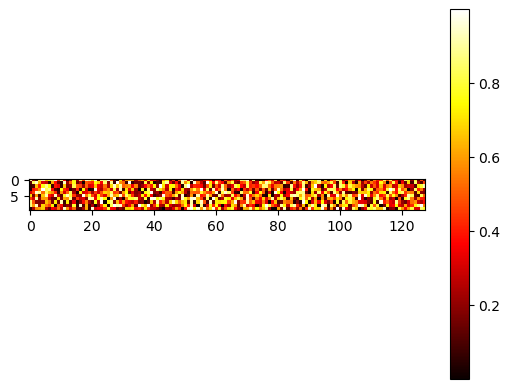

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Selecting the first batch and the first channel
batch = x[0]
channel = batch[0,:,:]

# Plotting the heatmap
plt.imshow(channel, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


In [41]:
# from IPython.display import Image

# file_path = file_paths[0]
# Image(filename=file_path)


Still need access to the raw image data so that I can load in the images.

There should be some file for the CheXpert data which has directory names that match the `Path`s included in the above `file_paths` array.

The data is online, but it should be hosted onto the HPC. I am awaiting information about whether the data already exists/will exist in our group directory whenever that information gets added to the HPC.

I could right now load all the data using the following command 

`wget http://download.cs.stanford.edu/deep/CheXpert-v1.0-small.zip -O downloads/CheXpert-v1.0-small.zip` 

but the file is ~11 GB so I will hold off for now.

<hr>

In [78]:
import os, sys
import pandas as pd
import numpy as np

In [104]:
train2023_df = pd.read_csv('../Data/train2023.csv')

In [105]:
file_paths = train2023_df['Path'].values[:-1]

In [106]:
file_paths

array(['train/pid50512/study1/view1_frontal.jpg',
       'train/pid21580/study2/view1_frontal.jpg',
       'train/pid21580/study1/view1_frontal.jpg', ...,
       'train/pid16708/study1/view1_frontal.jpg',
       'train/pid32381/study1/view1_frontal.jpg',
       'train/pid25865/study1/view1_frontal.jpg'], dtype=object)

In [107]:
len(file_paths)

178157

In [ ]:
178158

In [ ]:
data_path = '/groups/CS156b/data'

In [82]:
count = 0
for file in file_paths:
    if 'CheXpert-v1' in file:
        count += 1

count

1

In [96]:
len(file_paths)

178158

In [97]:
file_paths

array(['train/pid50512/study1/view1_frontal.jpg',
       'train/pid21580/study2/view1_frontal.jpg',
       'train/pid21580/study1/view1_frontal.jpg', ...,
       'train/pid32381/study1/view1_frontal.jpg',
       'train/pid25865/study1/view1_frontal.jpg',
       'CheXpert-v1.0/train/patient64540/study1/view1_frontal.jpg'],
      dtype=object)

In [98]:
file_paths[-1]

'CheXpert-v1.0/train/patient64540/study1/view1_frontal.jpg'

In [100]:
paths = file_paths[:-1]

In [101]:
paths

array(['train/pid50512/study1/view1_frontal.jpg',
       'train/pid21580/study2/view1_frontal.jpg',
       'train/pid21580/study1/view1_frontal.jpg', ...,
       'train/pid16708/study1/view1_frontal.jpg',
       'train/pid32381/study1/view1_frontal.jpg',
       'train/pid25865/study1/view1_frontal.jpg'], dtype=object)

In [102]:
len(paths)

178157

In [108]:
paths[0]

'train/pid50512/study1/view1_frontal.jpg'

In [109]:
'/groups/CS156b/data/' + paths[0]

'/groups/CS156b/data/train/pid50512/study1/view1_frontal.jpg'

In [103]:
count=0
for file in paths:
    if 'train' in file:
        count += 1
count

178157

In [74]:
# folder_files = os.listdir(data_path)

In [75]:
# dataframes = []

# for i, file in enumerate(file_paths):
#     if file not in ('.ipynb_checkpoints', '.DS_Store'):
#         df = pd.read_fwf(os.path.join(data_path, file), encoding='ISO-8859-1')
#         for key in gc_dict.keys():
#             if key in file:
#                 # print(key, len(df))
#                 df = df.assign(gc_tag = gc_dict[key])
#         dataframes.append(df)

In [40]:
subset_paths = np.load('../Data/train_data_subset.npy')

In [41]:
subset_paths[0]

'/groups/CS156b/data/train/pid50512/study1/view1_frontal.jpg'

Above are the file paths to a subset of the .jpeg train raw images. You will need to write a script to download all of them separately using scp and then join them together into a .zip file. For now, let's use scp to load in one of the files, and then look at the image here.

Lets use `'/groups/CS156b/data/train/pid50512/study1/view1_frontal.jpg'`

In [10]:
from IPython.display import Image

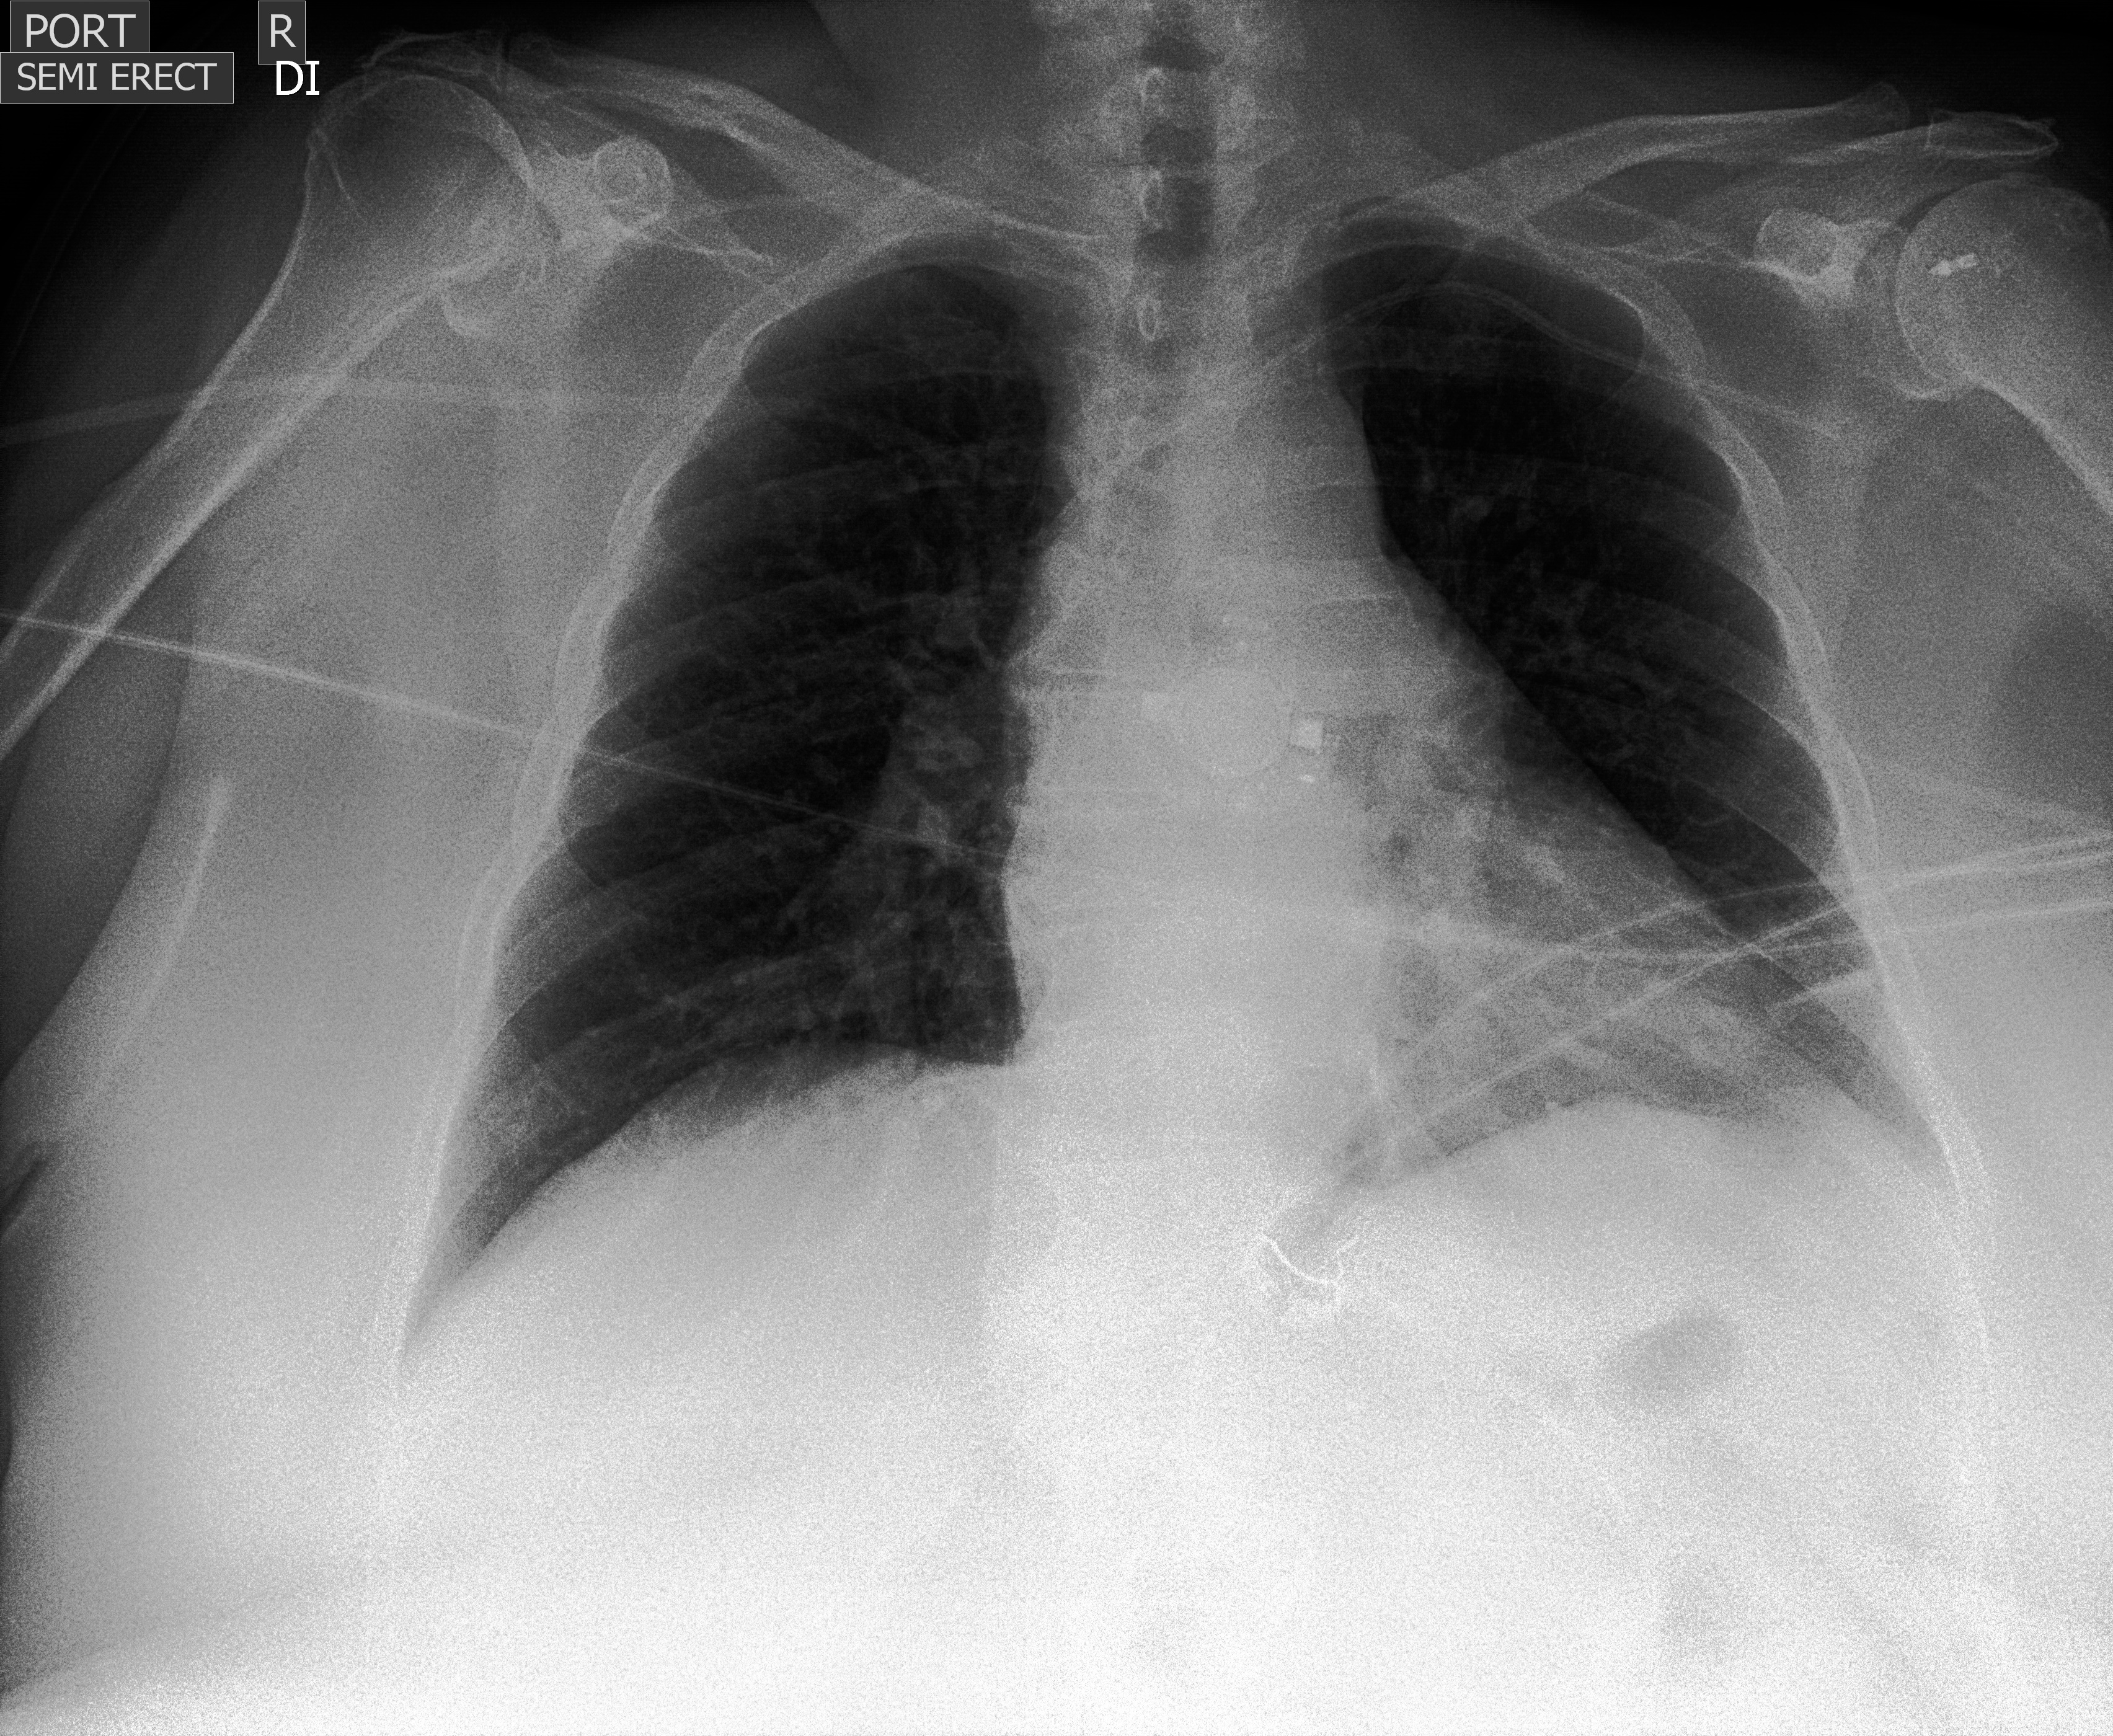

In [4]:
# Path to your JPEG image
image_path = "../Data/view1_frontal.jpg"

# Display the image
Image(filename=image_path)

And the pathology for this image?

In [119]:
train2023_df.loc[train2023_df['Path'] == 'train/pid50512/study1/view1_frontal.jpg',:]

Unnamed: 0.1  Unnamed: 0                                     Path     Sex  \
0             0           0  train/pid50512/study1/view1_frontal.jpg  Female   

   Age Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  \
0   68         Frontal    AP         1.0                         NaN   

   Cardiomegaly  Lung Opacity  Pneumonia  Pleural Effusion  Pleural Other  \
0           NaN           NaN        NaN               NaN            NaN   

   Fracture  Support Devices  
0       NaN              1.0

For each pathology:

- `1` is positive
- `0` is uncertain
- `-1` is negative
- `Nan` is missing data 

So for the image above, `Support Devices` is true, and so is `No Finding`

<hr>

To actually work with the numerical pixel values, you probably need to use some converter, maybe `PyTorch.ToTensor()` before wrapping into a Dataset and then Dataloader with the associated labels?

In [121]:
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 9.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1


In [1]:
from torchvision.io import read_image

In [5]:
img = read_image(image_path)

In [6]:
img

tensor([[[  1,   1,   1,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  1,   1,   1,  ...,   1,   1,   1],
         ...,
         [172, 158, 152,  ..., 233, 200, 242],
         [163, 160, 137,  ..., 239, 231, 255],
         [175, 162, 130,  ..., 207, 205, 255]]], dtype=torch.uint8)

In [7]:
img.shape

torch.Size([1, 2800, 3408])

<div class = 'alert alert-warning'>

### IMPORTANT

Do all of the images have the buttons in the top left of the screen? 

This could detract away from the neural net's ability to pick up features relevant to certain pathologies if the buttons are there for some but not others.

In [20]:
images_dir = '../Data/train_data_subset'

In [22]:
# Get a list of all image files in the directory
images = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

In [32]:
images[0].split('_')[1].split('.')[0]

'178'

<div class = 'alert alert-info'>

Sort the images in numerical order so you can easily attribute the labels in the train2023_df based on the image path in the train_subset_images.npy file

In [33]:
# np.sort(images)

In [34]:
images_sorted = sorted(images, key=lambda x: int(x.split('_')[1].split('.')[0]))

In [35]:
len(images) == 179

True

In [36]:
len(images_sorted)

179

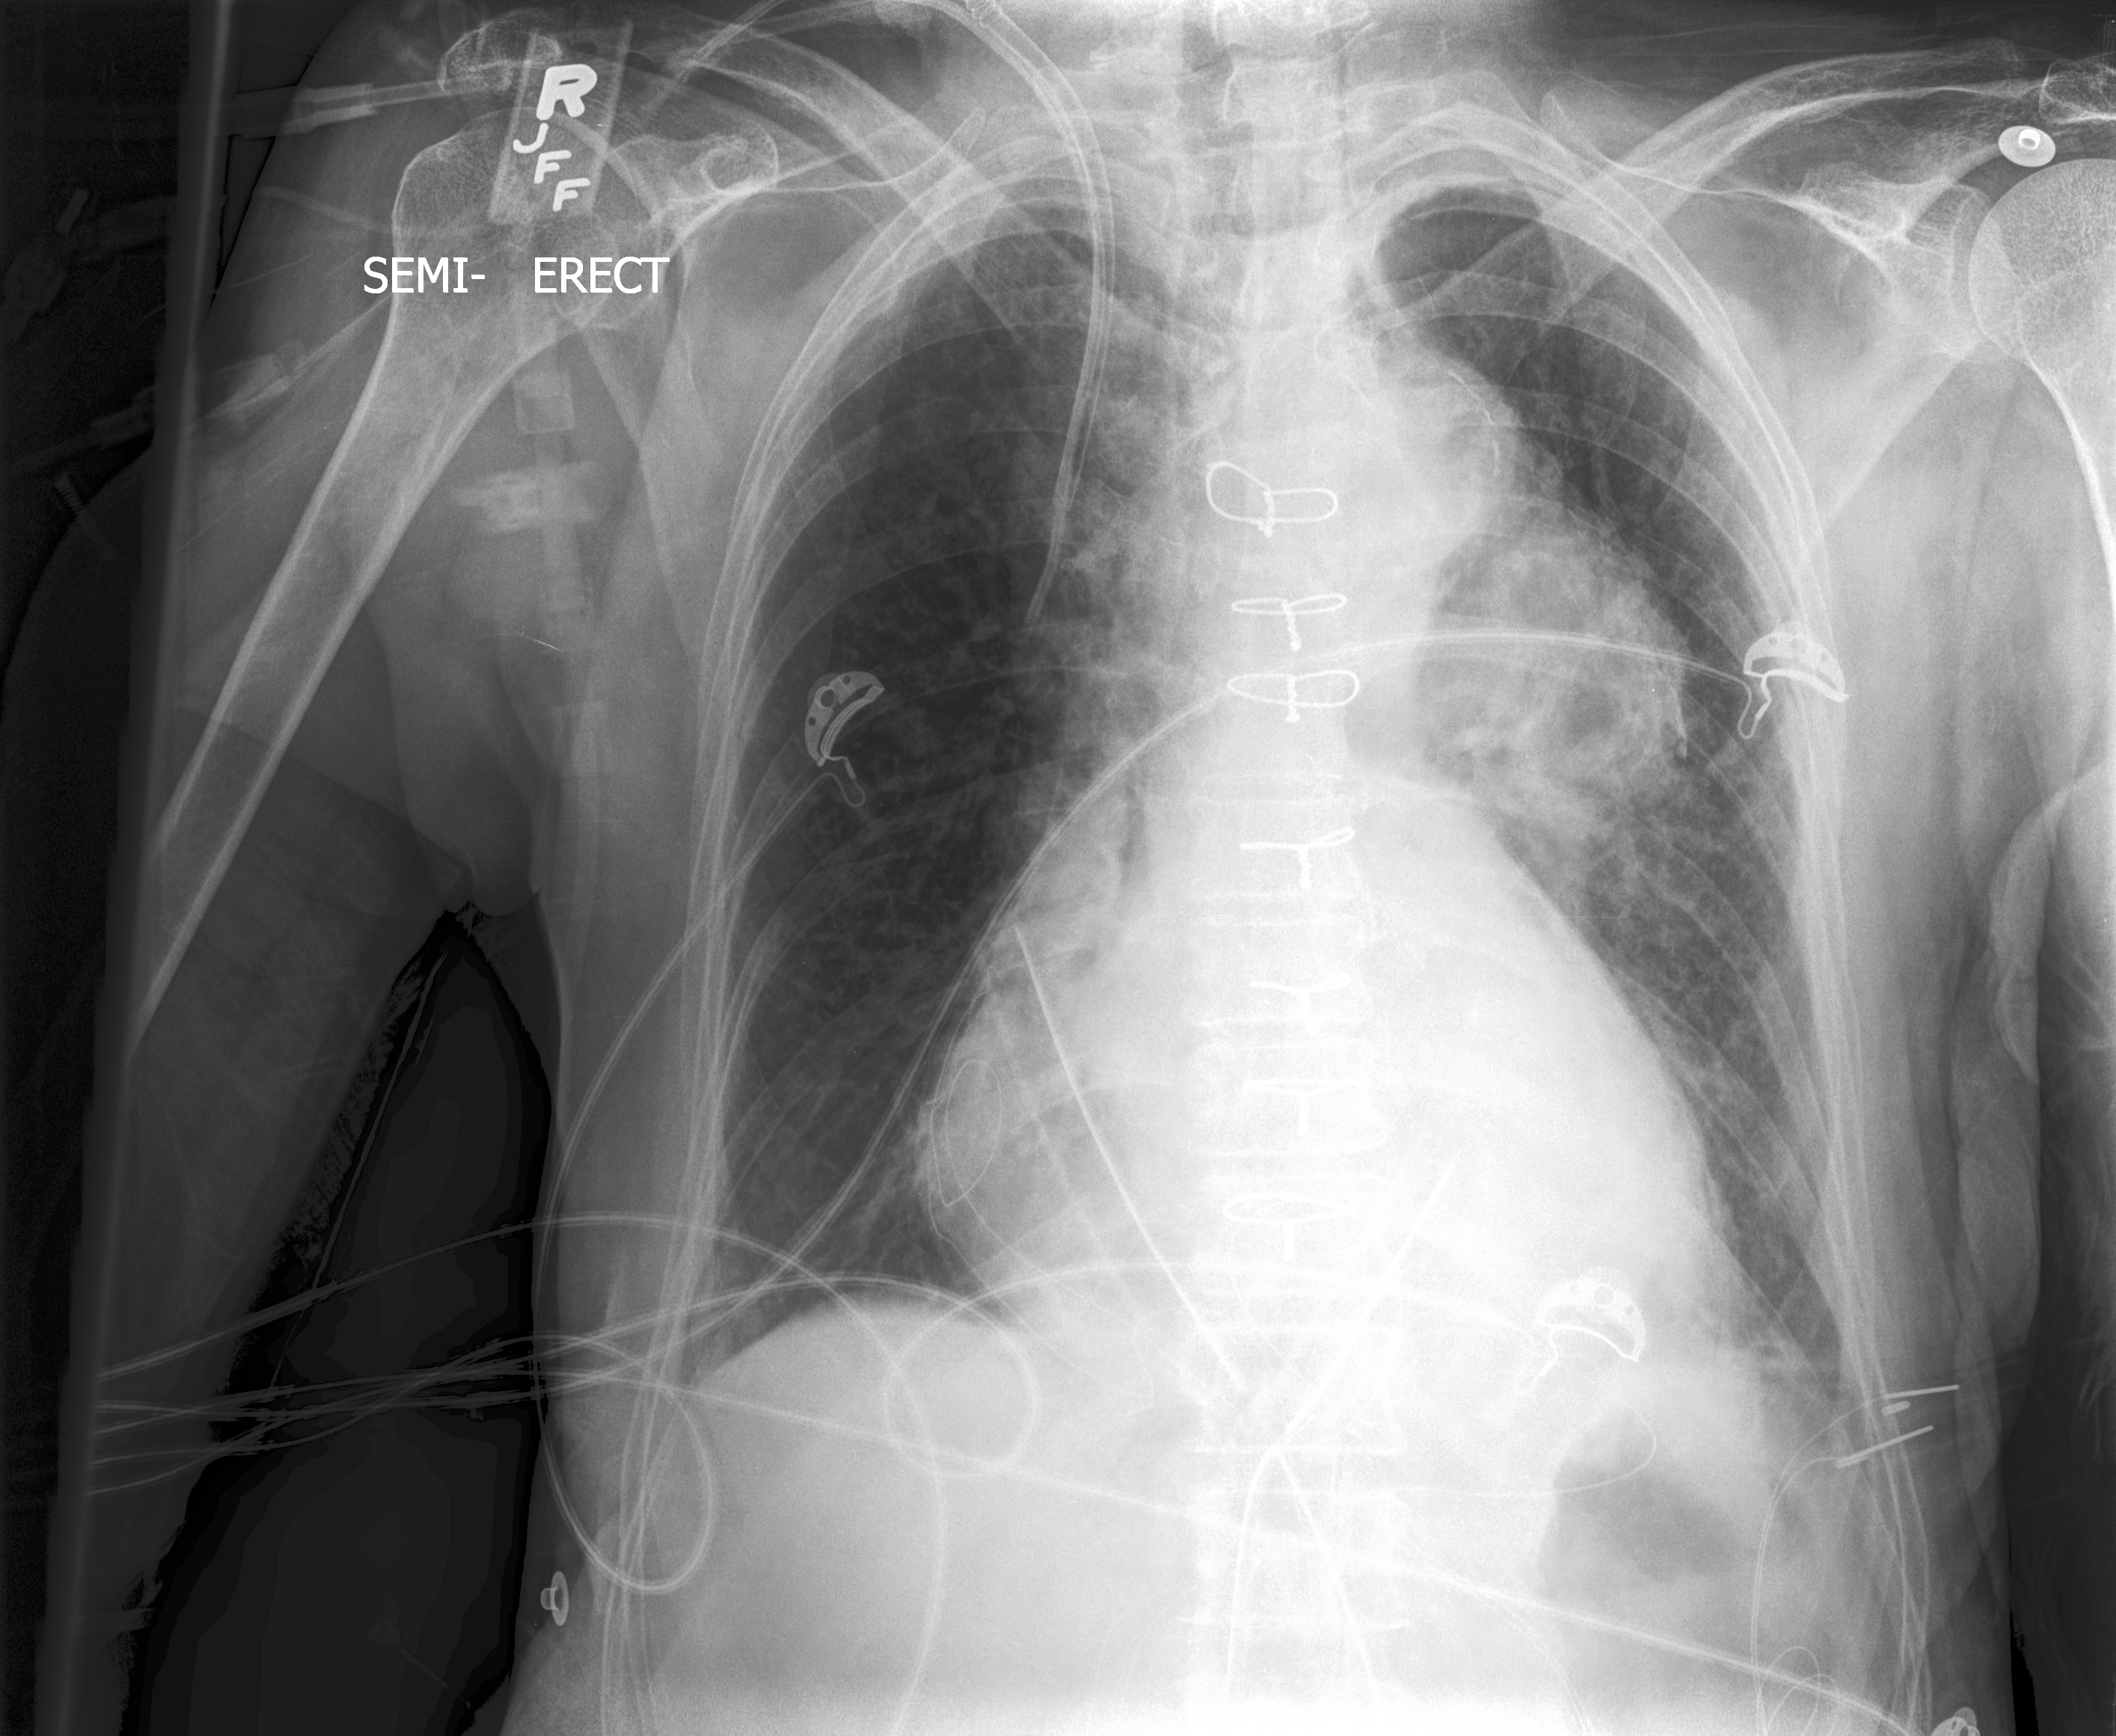

In [26]:
# Display the image
Image(filename=os.path.join(images_dir, images[0]))

The paths in `subset_paths` contains an extra `'/groups/CS156b/data/` before the path that is stored within the dataframe.

Need to extract the bit after `'/groups/CS156b/data/` in each string of `subset_paths`

In [70]:
subset_paths[0].split('/groups/CS156b/data/')[1]

'train/pid50512/study1/view1_frontal.jpg'

In [71]:
sub_paths = [path.split('/groups/CS156b/data/')[1] for path in subset_paths]

In [72]:
subset_df = train2023_df.loc[train2023_df['Path'].isin(sub_paths)]

In [73]:
subset_df

Unnamed: 0.1  Unnamed: 0                                     Path  \
0                  0           0  train/pid50512/study1/view1_frontal.jpg   
1000            1000        1172  train/pid29112/study1/view2_lateral.jpg   
2000            2000        2457  train/pid01032/study2/view1_frontal.jpg   
3000            3000        3744  train/pid22981/study1/view1_frontal.jpg   
4000            4000        4954  train/pid50403/study2/view1_frontal.jpg   
...              ...         ...                                      ...   
174000        174000      218286  train/pid13224/study3/view1_frontal.jpg   
175000        175000      219503  train/pid23285/study1/view1_lateral.jpg   
176000        176000      220756  train/pid20230/study1/view1_frontal.jpg   
177000        177000      221973  train/pid20342/study2/view1_frontal.jpg   
178000        178000      223216  train/pid26570/study1/view1_frontal.jpg   

           Sex  Age Frontal/Lateral AP/PA  No Finding  \
0       Female   68         Frontal    AP         1.0   
1000      Male   68         Lateral   NaN         1.0   
2000    Female   71         Frontal    PA         1.0   
3000    Female   54         Frontal    AP         1.0   
4000      Male   22         Frontal    AP         NaN   
...        ...  ...             ...   ...         ...   
174000    Male   79         Frontal    AP         1.0   
175000    Male   76         Lateral   NaN         NaN   
176000    Male   25         Frontal    AP         NaN   
177000    Male   59         Frontal    AP         NaN   
178000  Female   75         Frontal    AP         NaN   

        Enlarged Cardiomediastinum  Cardiomegaly  Lung Opacity  Pneumonia  \
0                              NaN           NaN           NaN        NaN   
1000                           NaN           NaN           NaN        NaN   
2000                           NaN           NaN           NaN        NaN   
3000                          -1.0           NaN          -1.0        NaN   
4000                           NaN           NaN           NaN        NaN   
...                            ...           ...           ...        ...   
174000                         NaN           NaN           NaN        NaN   
175000                         NaN           NaN           NaN        NaN   
176000                         NaN           NaN           1.0        NaN   
177000                         NaN           NaN           1.0        NaN   
178000                         1.0           NaN           1.0        NaN   

        Pleural Effusion  Pleural Other  Fracture  Support Devices  
0                    NaN            NaN       NaN              1.0  
1000                 0.0            NaN       NaN              1.0  
2000                -1.0            NaN       NaN              NaN  
3000                -1.0            NaN       NaN              NaN  
4000                 NaN            NaN       NaN              NaN  
...                  ...            ...       ...              ...  
174000               NaN            NaN       NaN              1.0  
175000               NaN            NaN       NaN              1.0  
176000               1.0            NaN       NaN              NaN  
177000               1.0            NaN       NaN              1.0  
178000               NaN            NaN       NaN              1.0  

[179 rows x 16 columns]

Good $\checkmark$ 

We took every $1000^{th}$ image so this looks correct

<hr>

Next step: 

Get the pathologies for each person/image stored in an array of length (8?) and format the data to be put into a transformer. 

- Look into [this pre-trained vision transformer on HuggingFace](https://huggingface.co/blog/vision-transformers)                   